# Cleveland Heart Disease dataset (UCI Repository) — Machine Learning Project

## Introduction

Heart disease is one of the leading causes of mortality worldwide, affecting millions of individuals. Early detection of heart disease is essential for preventive treatment and can significantly improve the quality and longevity of patients' lives. Leveraging data and machine learning algorithms to predict heart disease presence can provide additional support for healthcare professionals and enable quicker, more accurate diagnoses.

The Cleveland Heart Disease Dataset, widely used in medical and machine learning research, offers a set of clinical characteristics that can be analyzed to predict the presence of heart disease. This project will utilize this data to train machine learning models to predict a patient’s condition (presence or absence of heart disease) based on given clinical variables.

## Problem Statement

The goal is to predict the presence of heart disease in patients using clinical data. The dataset used in this project is the Cleveland Heart Disease Dataset, available in the UCI Machine Learning Repository. This dataset comprises records from four databases (Cleveland, Hungary, Switzerland, and Long Beach V), but the Cleveland subset is commonly used as a benchmark and is therefore the focus of this project.

The target variable, target, indicates the presence (1) or absence (0) of heart disease in a patient. Our objective is to classify patients as either “diseased” or “healthy” based on variables like age, blood pressure, cholesterol, and more.

## Dataset

The Cleveland Heart Disease Dataset originally contains 76 attributes; however, we will use a subset of 14 attributes, as is standard in published experiments with this dataset. This subset includes relevant demographic and clinical variables, described below:
- Age: Age of the patient in years.
- Sex: Gender of the patient (1 = male, 0 = female).
- CP (Chest Pain Type): Type of chest pain experienced (4 types: typical angina, atypical angina, non-anginal pain, and asymptomatic).
- Trestbps (Resting Blood Pressure): Resting blood pressure in mm Hg.
- Chol (Serum Cholesterol): Serum cholesterol level in mg/dl.
- FBS (Fasting Blood Sugar): Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- Restecg (Resting Electrocardiographic Results): Resting ECG results (0 = normal; 1 = ST-T wave abnormality; 2 = left ventricular hypertrophy).
- Thalach (Maximum Heart Rate Achieved): Maximum heart rate achieved.
- Exang (Exercise-Induced Angina): Exercise-induced angina (1 = yes; 0 = no).
- Oldpeak: ST depression induced by exercise relative to rest.
- Slope: Slope of the peak exercise ST segment.
- Ca (Number of Major Vessels Colored by Fluoroscopy): Number of major vessels (0–3) colored by fluoroscopy.
- Thal: Thalassemia test result (3 = normal; 6 = fixed defect; 7 = reversible defect).
- Target: The target variable, indicating if heart disease is present (1) or absent (0).



## Evaluation

To assess model performance, the following classification metrics will be used:

- Confusion Matrix: Provides a detailed view of true and false predictions for each class.
- Precision, Recall, and F1 Score: The F1 Score, which is the harmonic mean of precision and recall, will be the primary performance metric, as it effectively balances precision and recall.

Additionally, an exploratory data analysis and visualization of the results will be conducted to identify initial patterns and evaluate the importance of each variable in predicting heart disease.

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

We're going to use scikit-learn for machine learning modelling and evaluation.

We're going to use seaborn for data visualization.

Let's import all the tools we need.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

### Load Data:

The first step in any machine learning project is to understand the data. We will load the dataset and perform an initial analysis to gain insights into the data structure, features, and target variable.

In [10]:
df = pd.read_csv('data/heart_cleveland_upload.csv')
df.rename(columns={'condition':'target'}, inplace = True)
print(df.shape)
df.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


### Data Analysis:


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataset is perfect does not have any missing values or null values. 

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
df.shape

(297, 14)

The dataset contains 297 rows and 14 columns. The target variable, target, indicates the presence (1) or absence (0) of heart disease in a patient. The remaining columns represent various clinical and demographic features that can be used to predict the target variable.

###  Analysis:

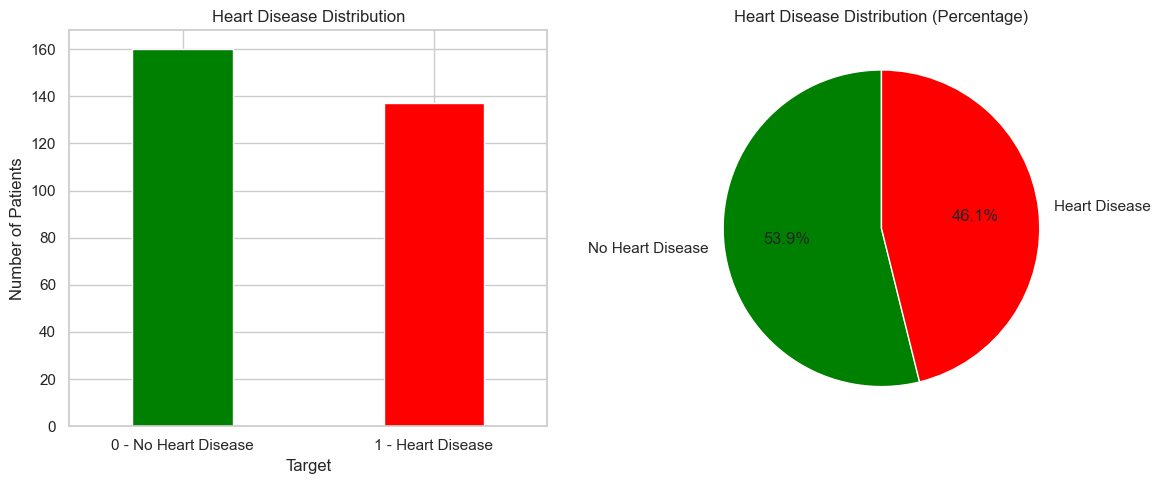

Number of Patients without Heart Disease:  160
Number of Patients with Heart Disease:  137
Percentage of Patients without Heart Disease: 53.87%
Percentage of Patients with Heart Disease: 46.13%


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

df['target'].value_counts().plot(kind='bar', color=['green', 'red'], width=0.4, ax=ax1)
ax1.set_title('Heart Disease Distribution')
ax1.set_xlabel('Target')
ax1.set_ylabel('Number of Patients')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['0 - No Heart Disease', '1 - Heart Disease'], rotation=0)

labels = ['No Heart Disease', 'Heart Disease']
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], startangle=90, ax=ax2, labels=labels)
ax2.set_ylabel('') 
ax2.set_title('Heart Disease Distribution (Percentage)')

plt.tight_layout()
plt.show()

print('Number of Patients without Heart Disease: ', df['target'].value_counts()[0])
print('Number of Patients with Heart Disease: ', df['target'].value_counts()[1])
print('Percentage of Patients without Heart Disease: {:.2f}%'.format(df['target'].value_counts()[0] / len(df) * 100))
print('Percentage of Patients with Heart Disease: {:.2f}%'.format(df['target'].value_counts()[1] / len(df) * 100))



We have 160 patients without heart disease and 137 patients with heart disease in the dataset. The target variable is relatively balanced, with a slight majority of patients not having heart disease. This balance is important to ensure that the model does not become biased towards predicting the majority class.


<Figure size 2000x2000 with 0 Axes>

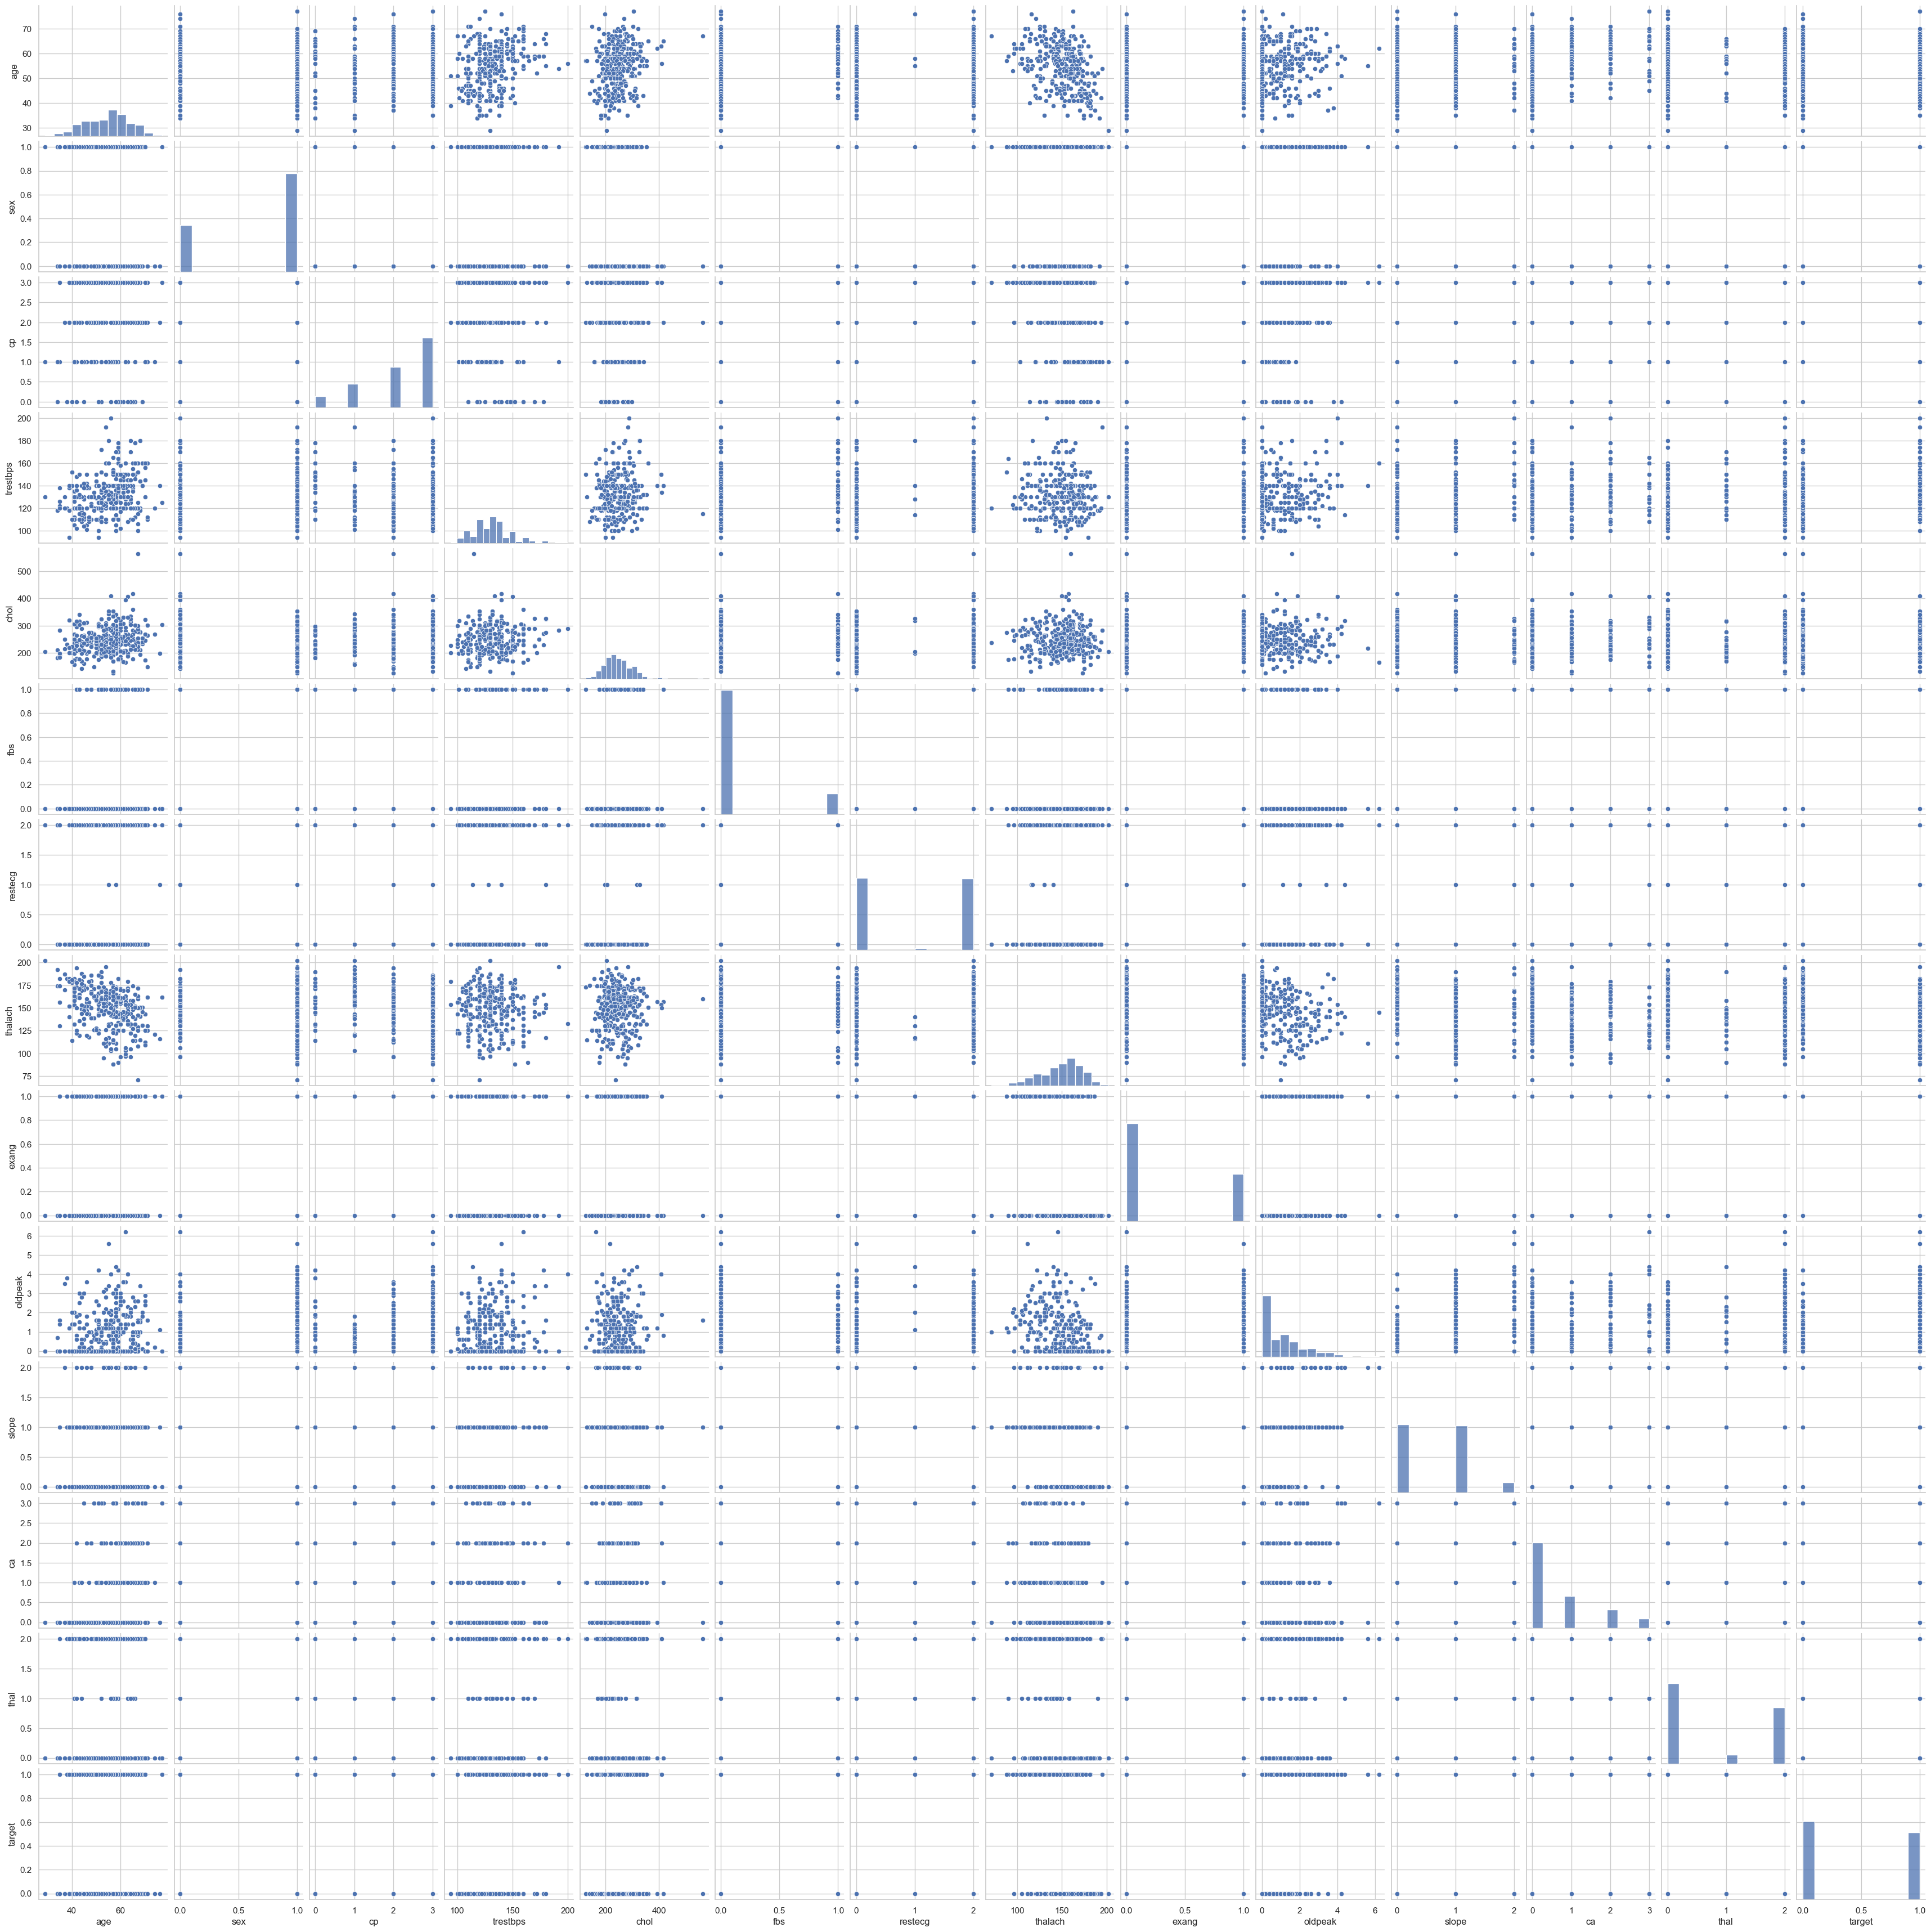

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

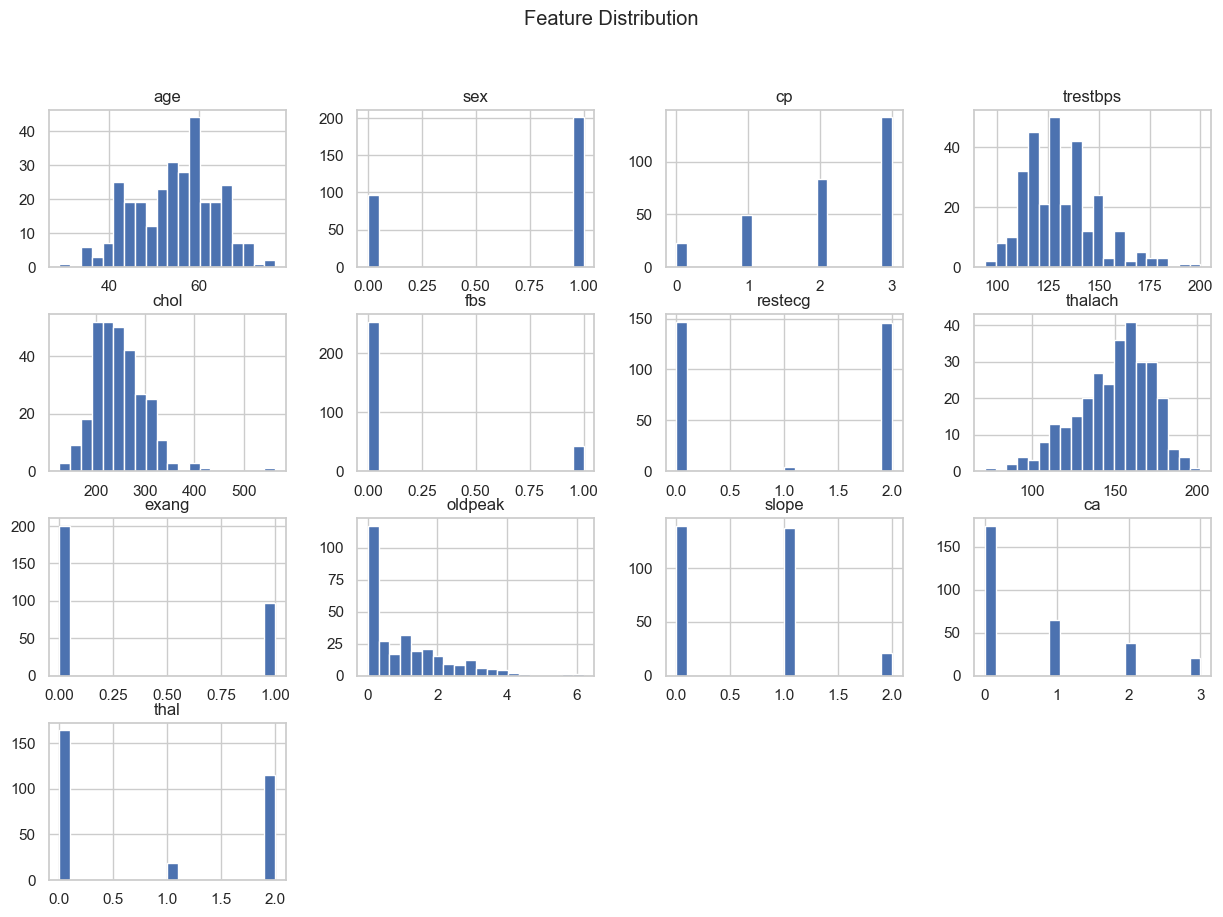

In [ ]:
dfx = df.drop(columns=["target"])
dfx.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distribution', ha='center', fontsize='large')
plt.show()


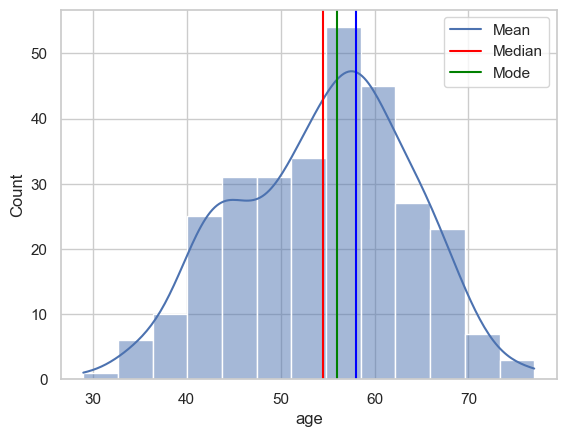

Mean 54.54208754208754
Median 56.0
Mode 0    58
Name: age, dtype: int64
Minimum 29
Maximum 77


In [ ]:
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'Green')
plt.axvline(df['age'].mode()[0], color='Blue')
plt.legend({'Mean':df['age'].mean(),'Median':df['age'].median(),'Mode':df['age'].mode()[0]})
plt.show()

print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())
print('Minimum', df['age'].min())
print('Maximum', df['age'].max())

The age distribution of patients in the dataset ranges from 29 to 77 years, with a mean age of approximately 54 years. The age distribution is relatively uniform, with a slight peak around 60 years. This distribution suggests that the dataset contains a diverse range of patients in terms of age.

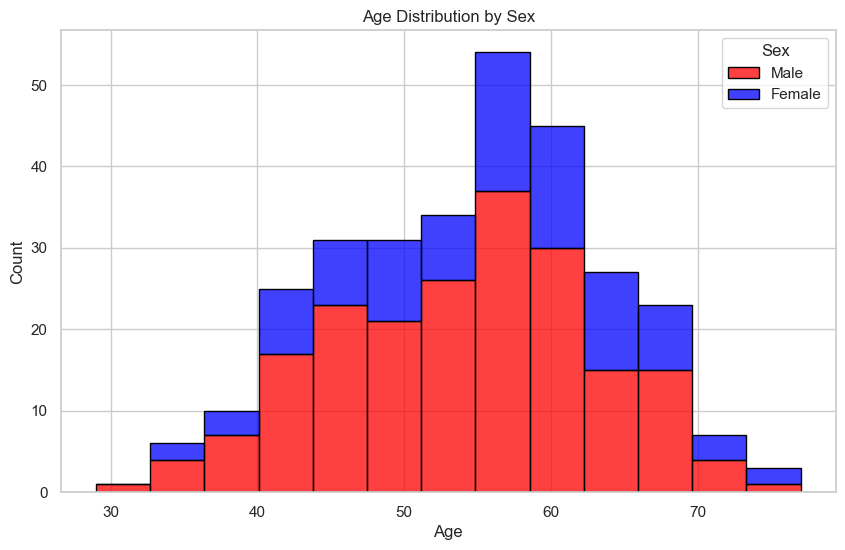

Number of Mens 201
Number of Womens 96
Percentage of Mens: 67.67676767676768
Percentage of Womens: 32.323232323232325


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='sex', multiple='stack', palette={0: 'blue', 1: 'red'},edgecolor='black')
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

print('Number of Men', df['sex'].value_counts()[1])
print('Number of Women', df['sex'].value_counts()[0])
print('Percentage of Men:', df['sex'].value_counts()[1] / df['sex'].value_counts().sum() * 100)
print('Percentage of Women:', df['sex'].value_counts()[0] / df['sex'].value_counts().sum() * 100)

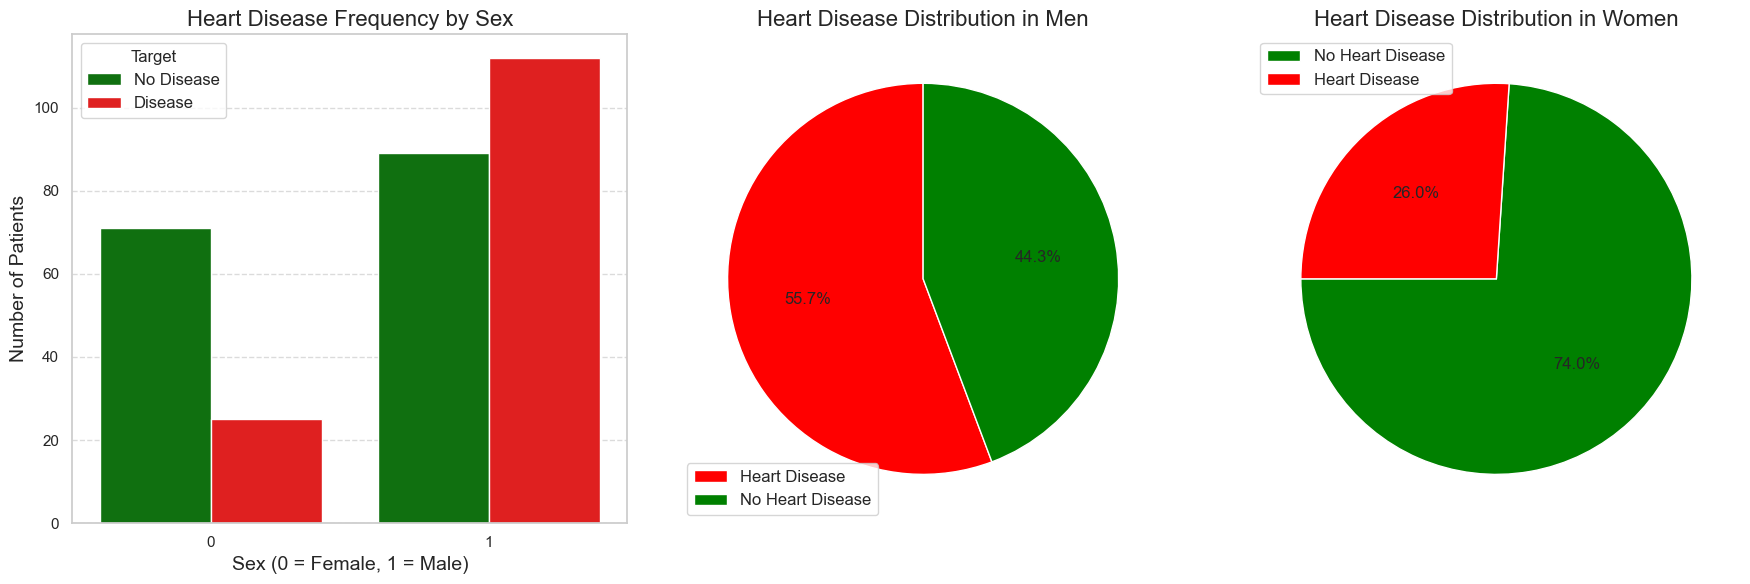

Number of Mens with Heart Disease: 112
Number of Mens without Heart Disease: 89
Percentage of Mens with Heart Disease:  55.72139303482587
Percentage of Mens without Heart Disease:  44.27860696517413

Number of Womens with Heart Disease 25
Number of Womens without Heart Disease 71
Percentage of Womens with Heart Disease:  26.041666666666668
Percentage of Womens without Heart Disease:  73.95833333333334


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=df, x='sex', hue='target', palette={0: 'green', 1: 'red'}, dodge=True, ax=ax1)
ax1.set_title('Heart Disease Frequency by Sex', fontsize=16)
ax1.set_xlabel('Sex (0 = Female, 1 = Male)', fontsize=14)
ax1.set_ylabel('Number of Patients', fontsize=14)
ax1.legend(title='Target', labels=['No Disease', 'Disease'], fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

men_counts = df[df['sex'] == 1]['target'].value_counts()
women_counts = df[df['sex'] == 0]['target'].value_counts()

ax2.pie(men_counts, autopct='%1.1f%%', startangle=90, colors=['red','green'])
ax2.set_title('Heart Disease Distribution in Men', fontsize=16)
ax2.legend(['Heart Disease', 'No Heart Disease'], loc='best', fontsize=12)

ax3.pie(women_counts, autopct='%1.1f%%', startangle=180, colors=['green', 'red'])
ax3.set_title('Heart Disease Distribution in Women', fontsize=16)
ax3.legend(['No Heart Disease', 'Heart Disease'], loc='best', fontsize=12)

plt.tight_layout()
plt.show()

print('Number of Mens with Heart Disease:', df[(df['sex'] == 1) & (df['target'] == 1)].shape[0])
print('Number of Mens without Heart Disease:', df[(df['sex'] == 1) & (df['target'] == 0)].shape[0])
print('Percentage of Mens with Heart Disease: ', df[(df['sex'] == 1) & (df['target'] == 1)].shape[0]/ (df['sex'] == 1).sum() * 100)
print('Percentage of Mens without Heart Disease: ', df[(df['sex'] == 1) & (df['target'] == 0)].shape[0]/ (df['sex'] == 1).sum() * 100)

print('\nNumber of Womens with Heart Disease', df[(df['sex'] == 0) & (df['target'] == 1)].shape[0])
print('Number of Womens without Heart Disease', df[(df['sex'] == 0) & (df['target'] == 0)].shape[0])
print('Percentage of Womens with Heart Disease: ', df[(df['sex'] == 0) & (df['target'] == 1)].shape[0]/ (df['sex'] == 0).sum() * 100)
print('Percentage of Womens without Heart Disease: ', df[(df['sex'] == 0) & (df['target'] == 0)].shape[0]/ (df['sex'] == 0).sum() * 100)


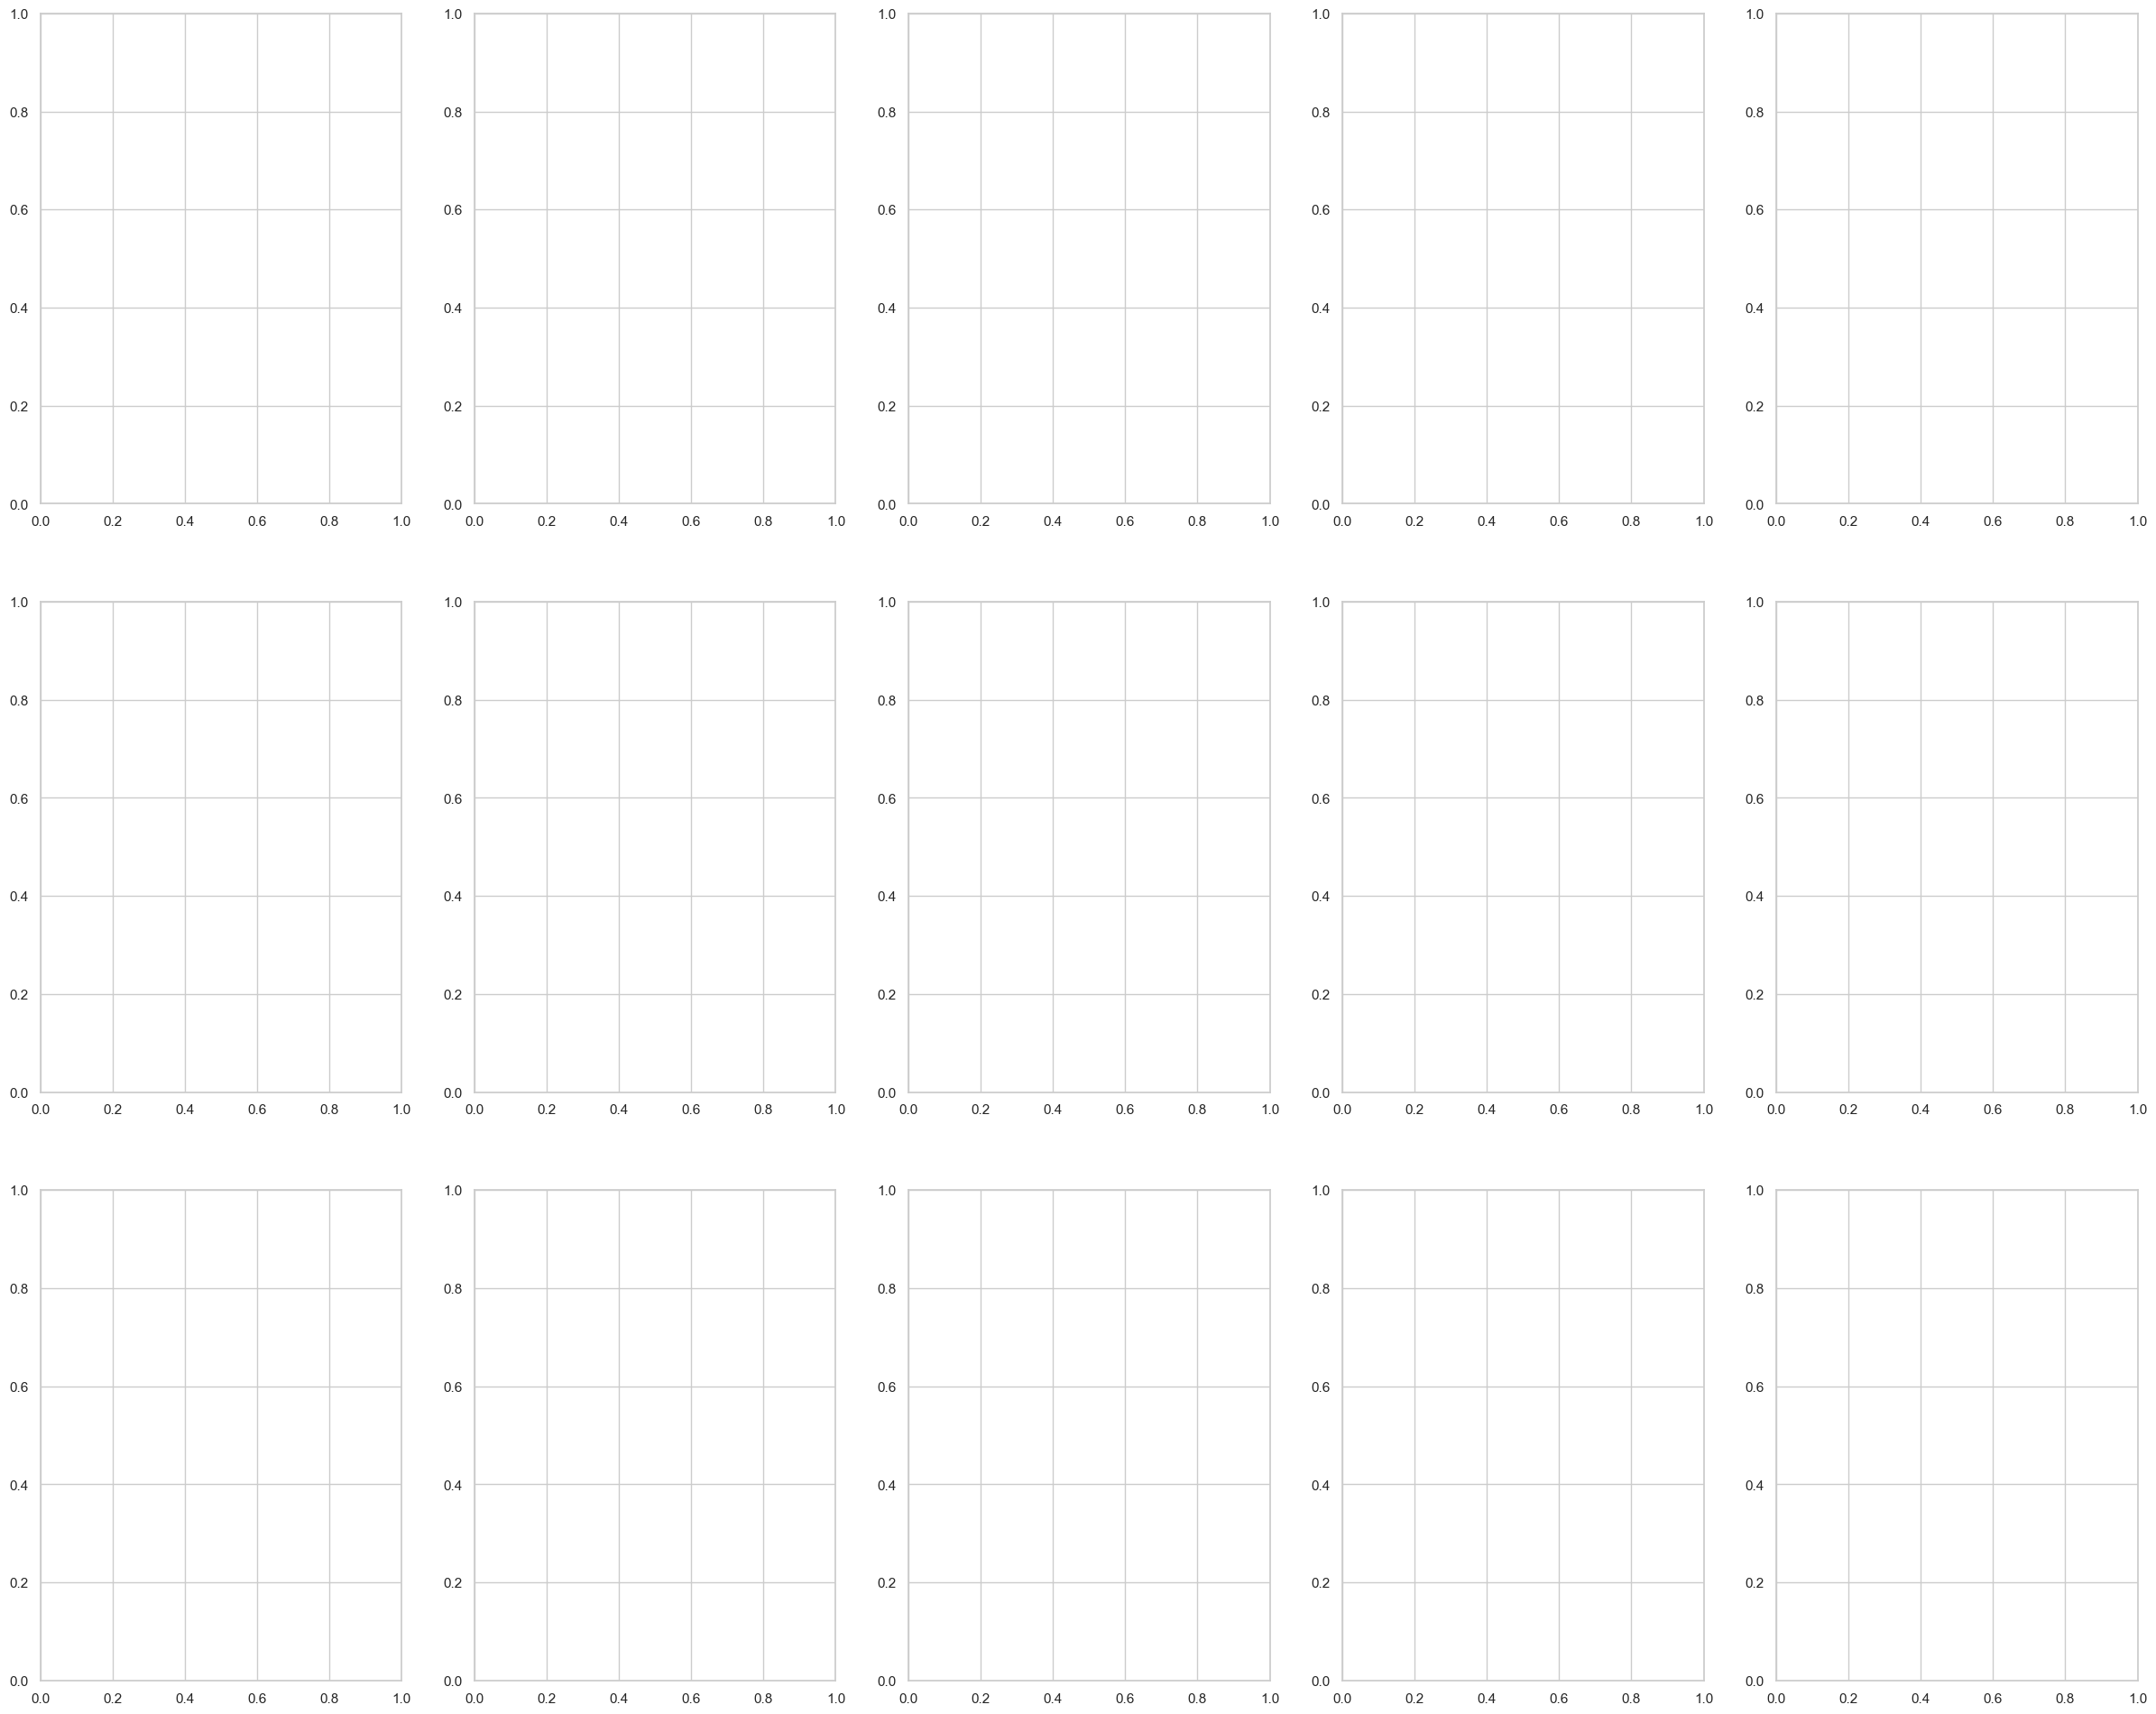

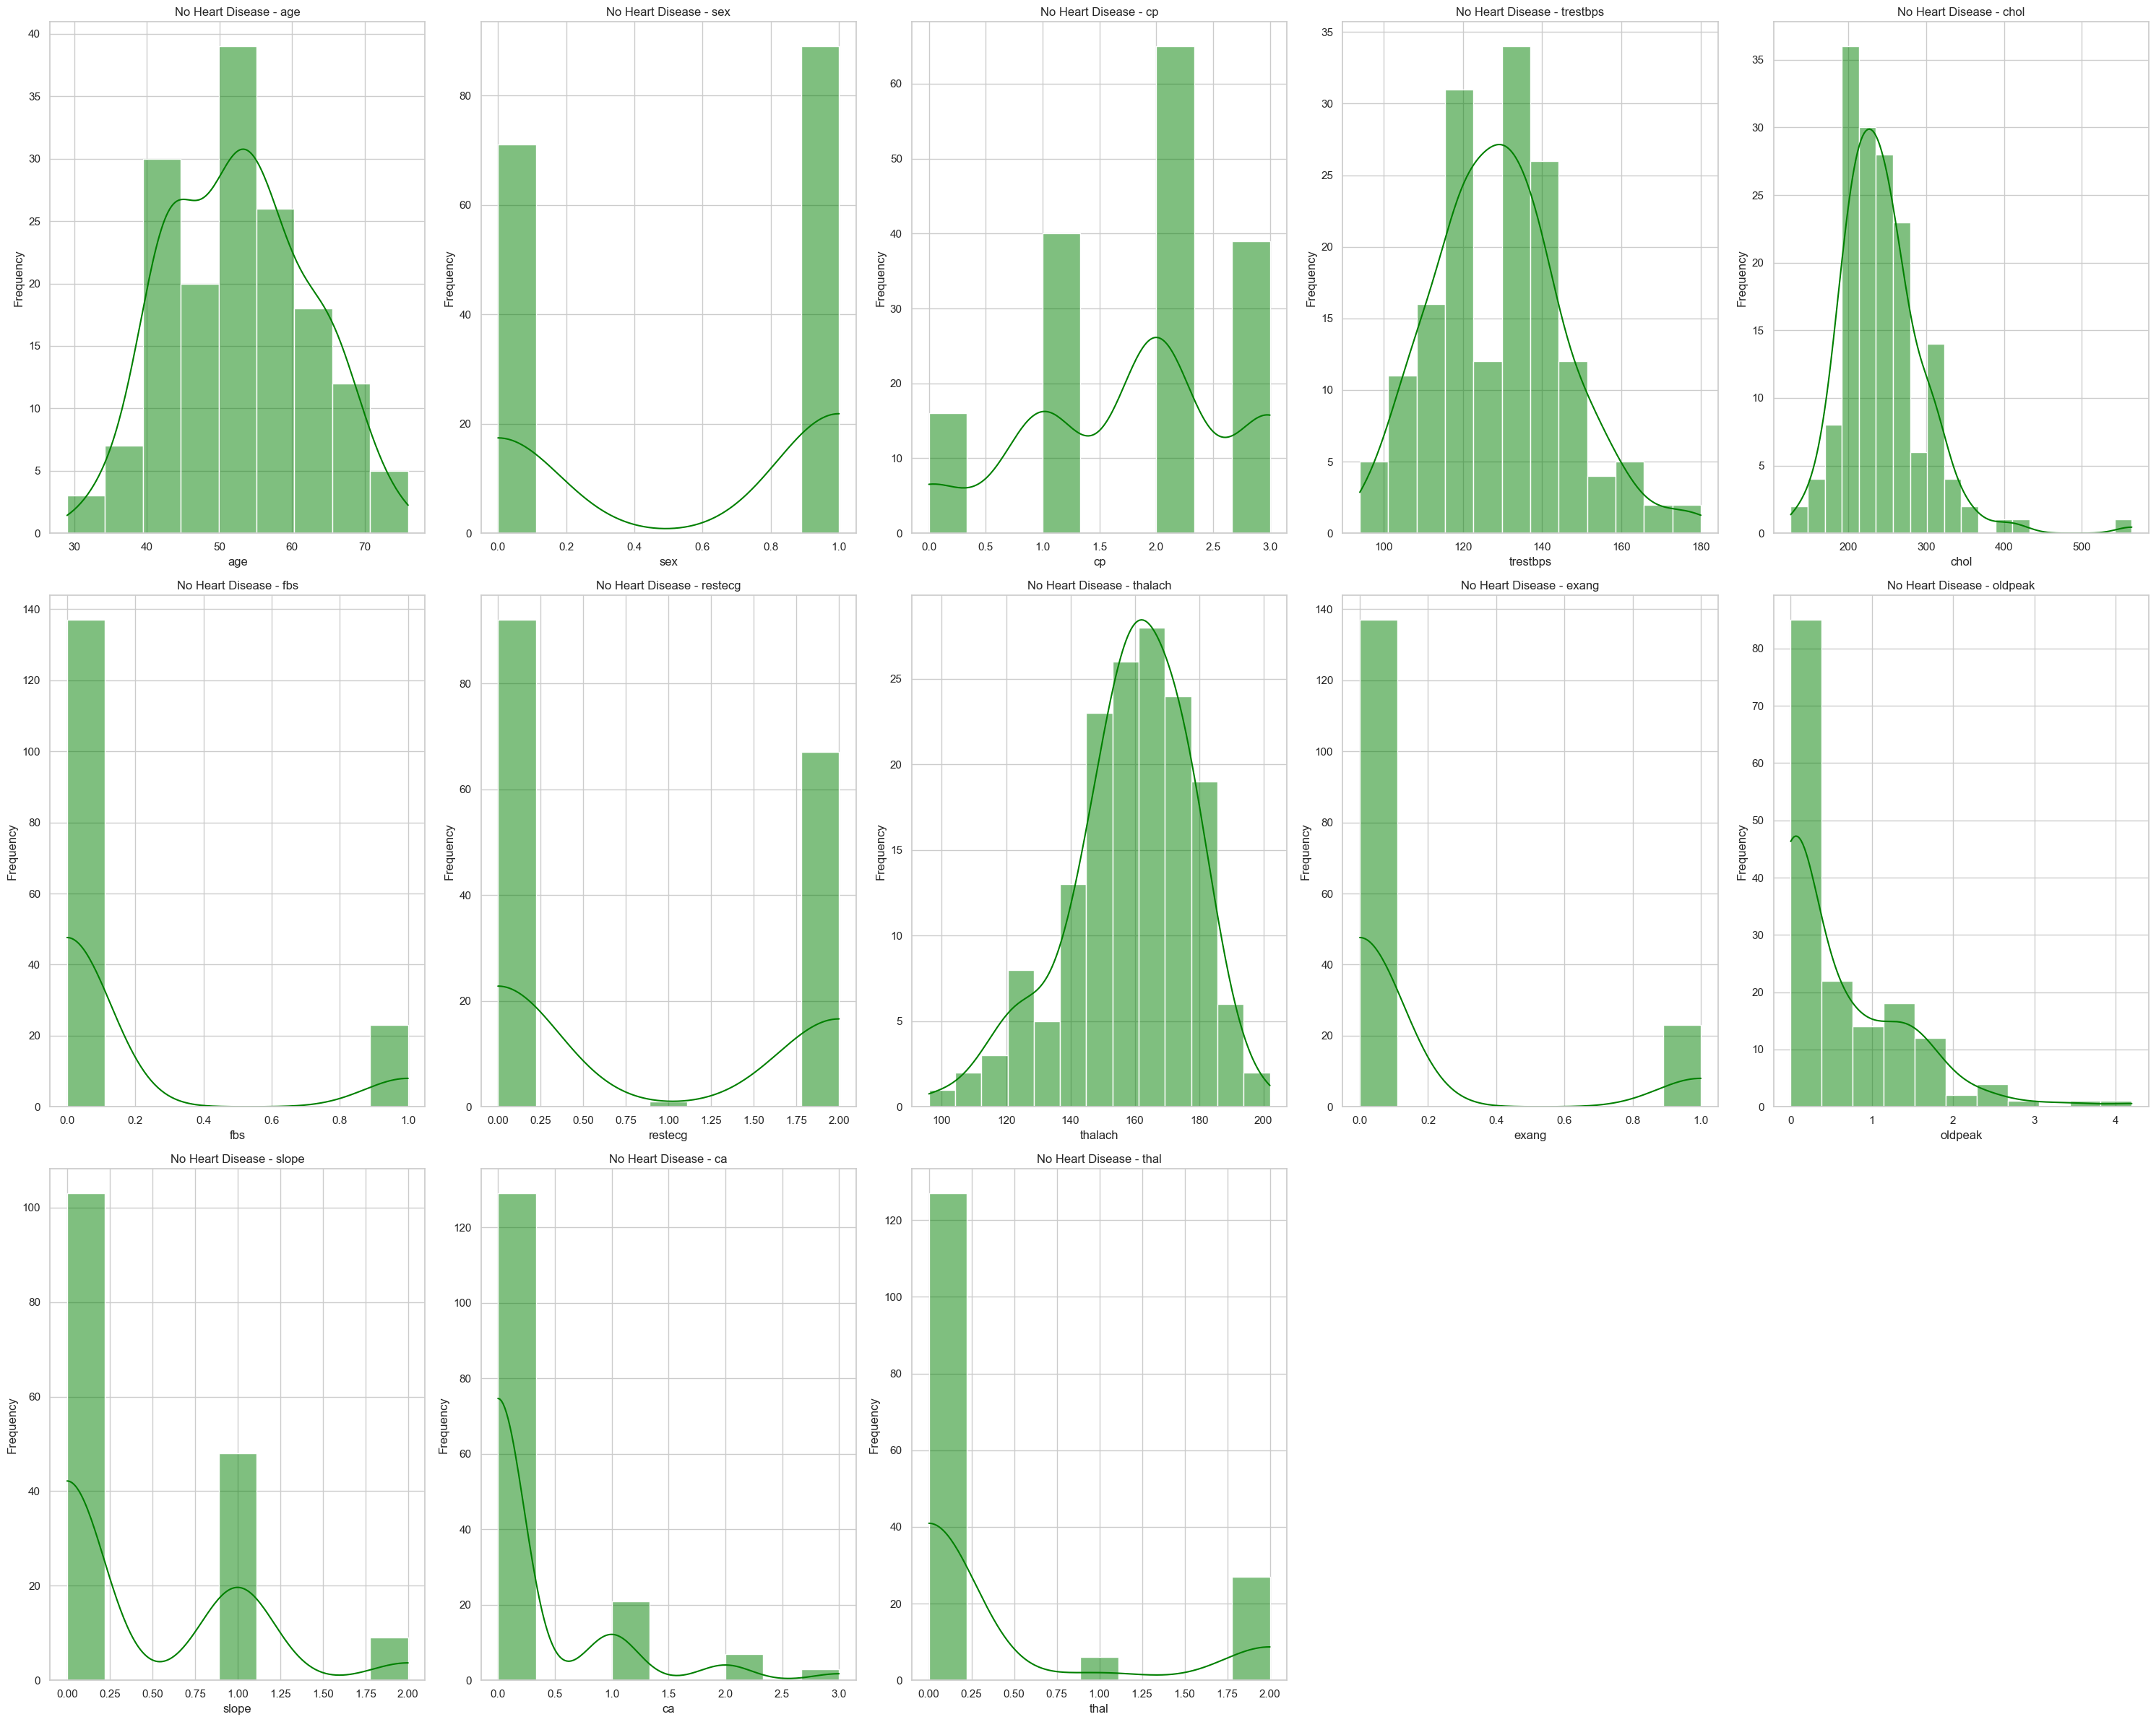

In [ ]:

num_features = len(df.columns) - 1  
num_cols = 5                       
num_rows = (num_features + num_cols - 1) // num_cols  

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(30, 8 * num_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns[0:-1]):
    df_no_heart = df[col][df.target == 0].values
    sns.histplot(df_no_heart, ax=axes[i], kde=True, color='green')
    axes[i].set_title('No Heart Disease - ' + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


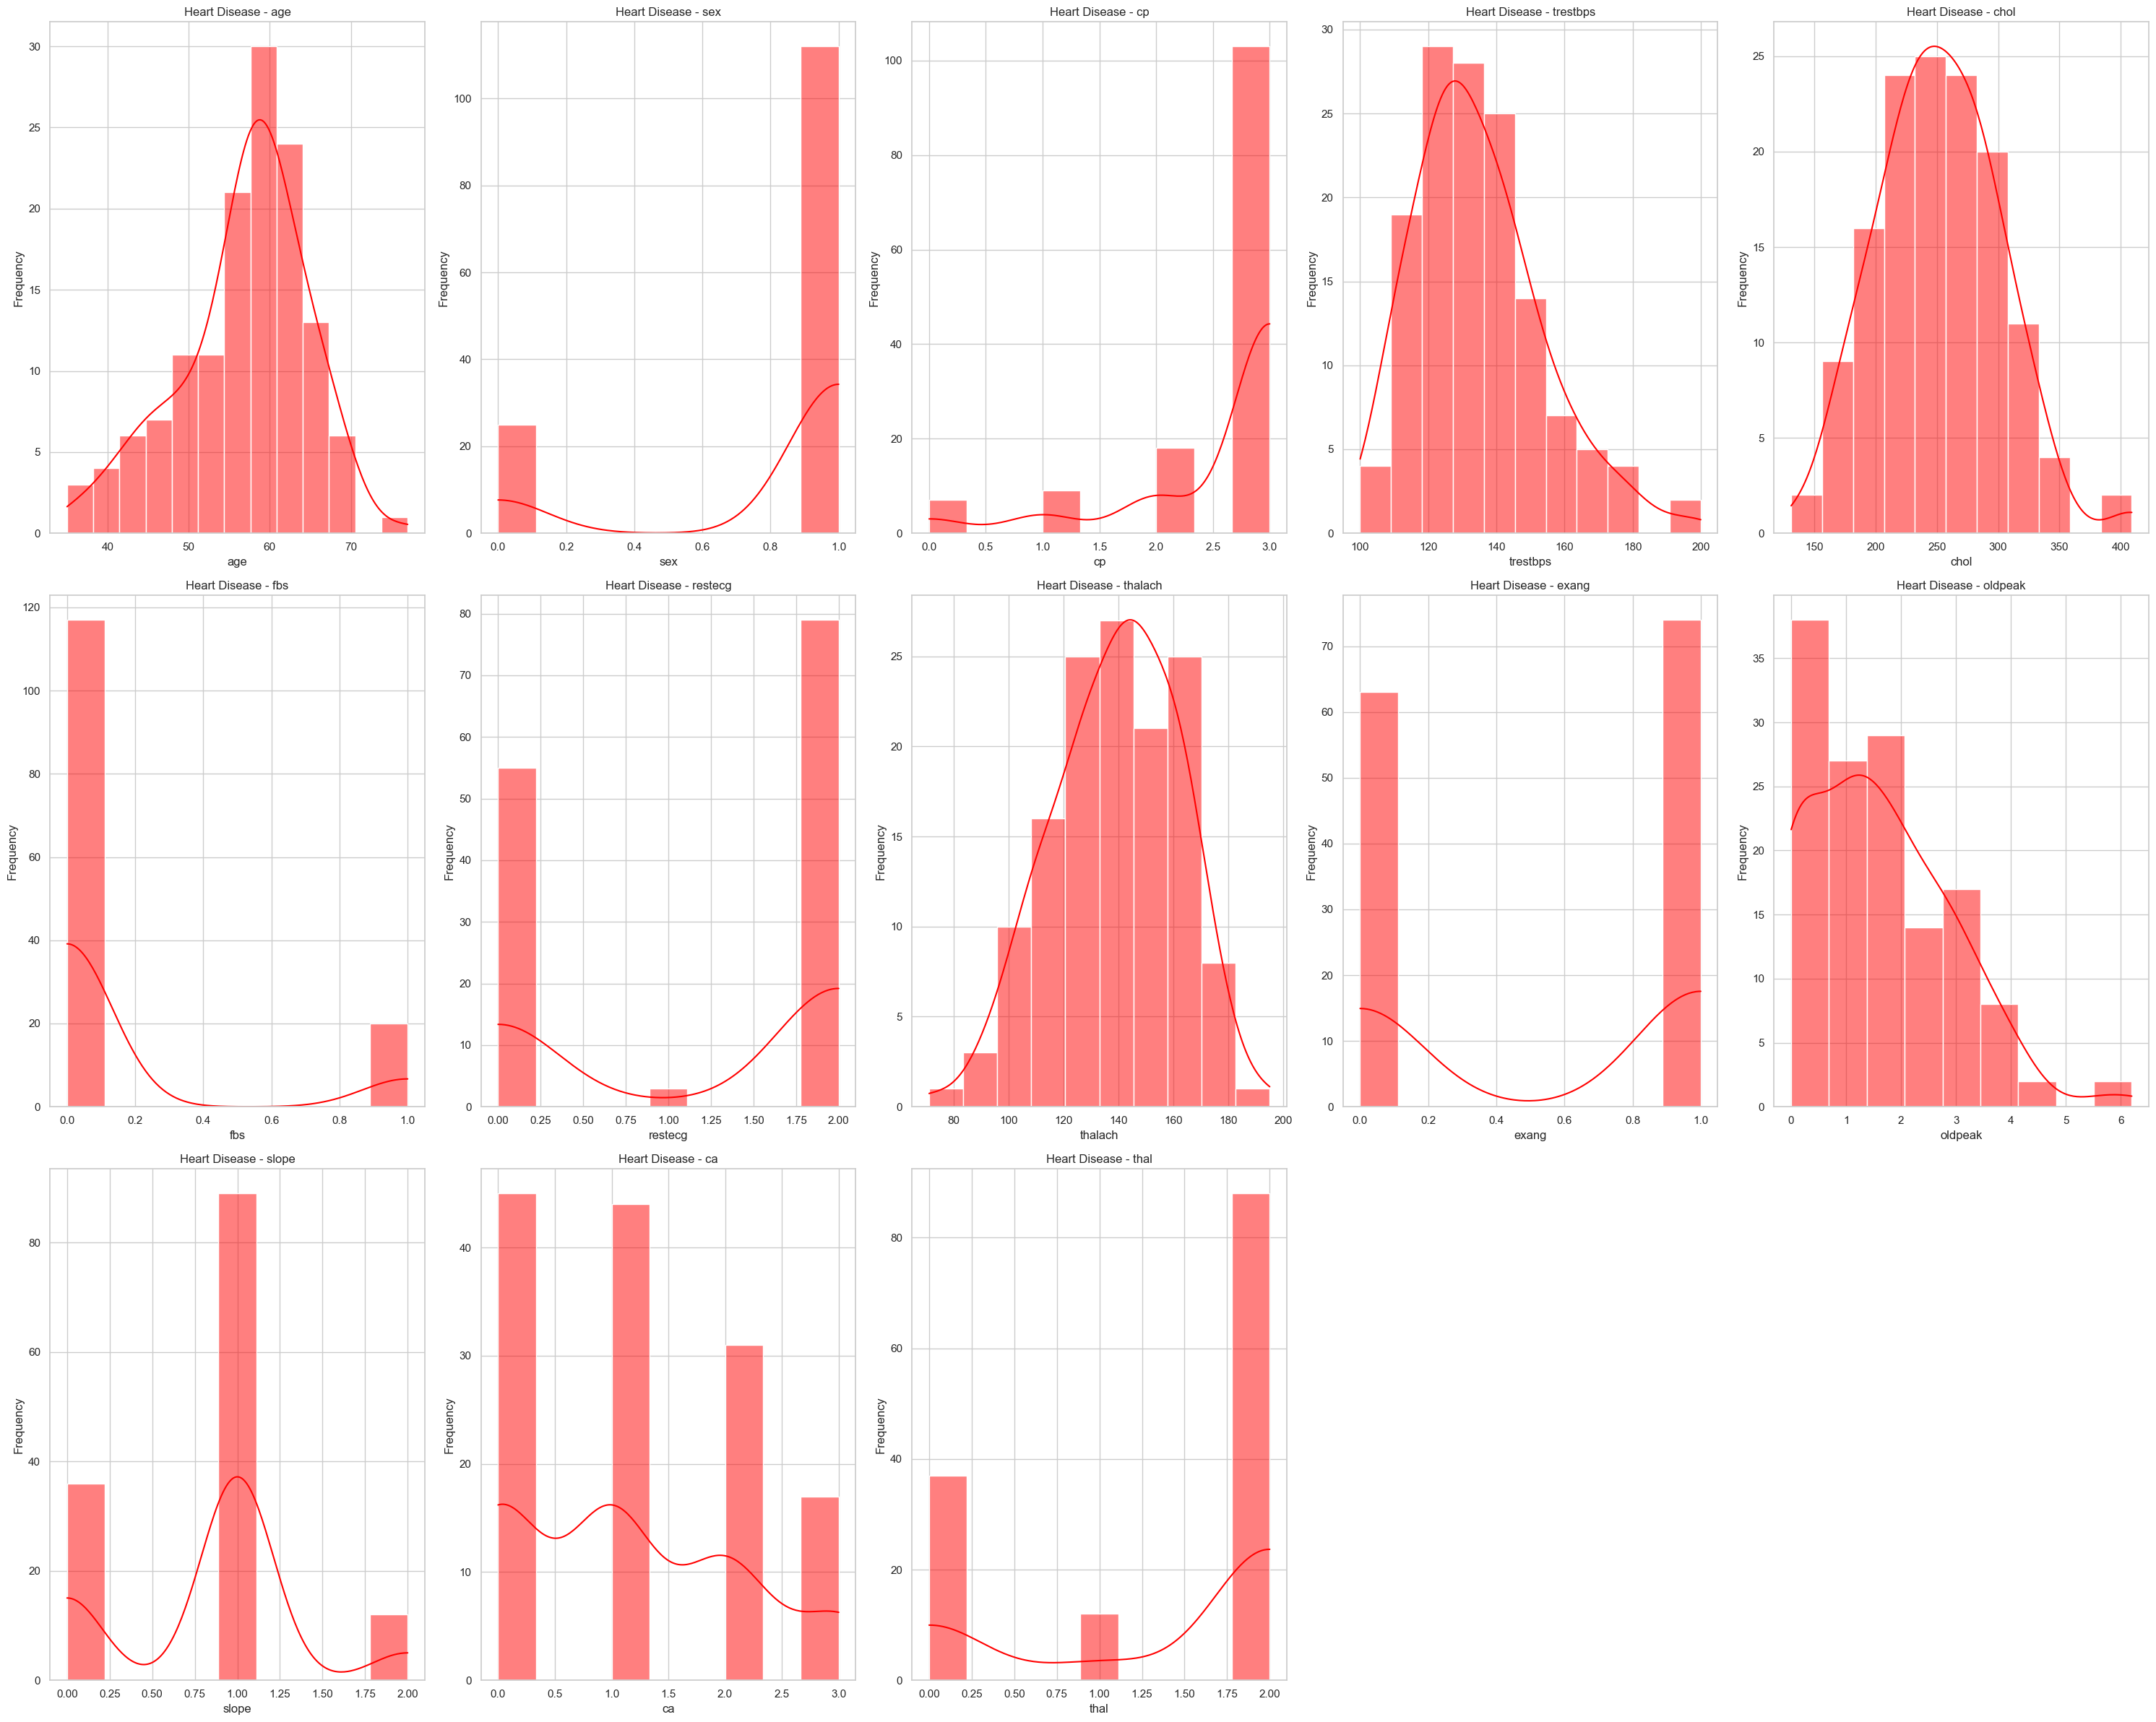

In [ ]:

num_features = len(df.columns) - 1  
num_cols = 5                       
num_rows = (num_features + num_cols - 1) // num_cols  

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(30, 8 * num_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns[0:-1]):
    df_heart = df[col][df.target == 1].values
    sns.histplot(df_heart, ax=axes[i], kde=True, color='red')
    axes[i].set_title('Heart Disease - ' + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


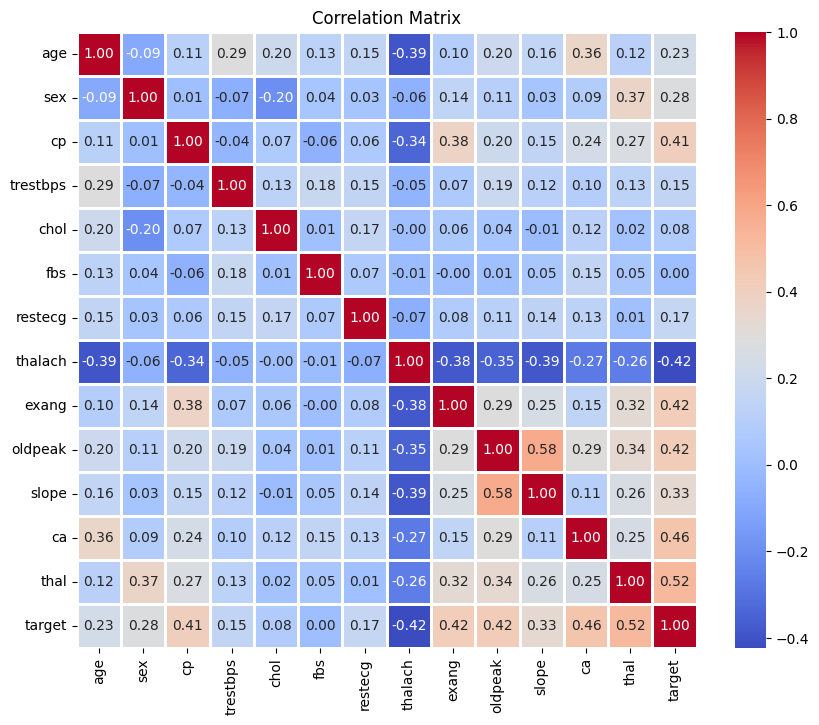

In [ ]:
matrix_corr = df.corr()
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix')
plt.show()


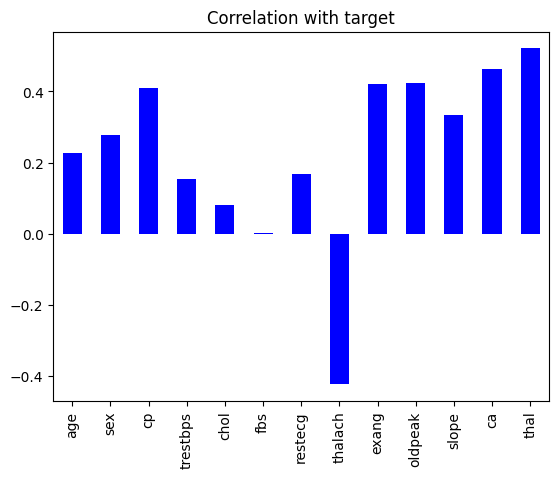

In [ ]:
correlation = df.drop('target', axis=1).corrwith(df['target']).plot(kind='bar', color='blue', title='Correlation with target')
plt.show()  

### Model Building:

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, validation_curve, learning_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, classification_report, confusion_matrix

In [13]:
X = df.drop(columns=['target'], axis=1)
y = df['target']

print('Shape of X:', X.shape)
print('Number of Features:', X.shape[1])
print('Number of Classes:', y.nunique())
print('Features:', X.columns)

Shape of X: (297, 13)
Number of Features: 13
Number of Classes: 2
Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.60030243,  0.69109474, -2.24062879, ...,  0.6437811 ,
         0.34482438, -0.87429153],
       [ 1.60030243, -1.44697961, -2.24062879, ..., -0.97658319,
         1.41162482, -0.87429153],
       [ 1.26824154, -1.44697961, -2.24062879, ...,  2.26414539,
        -0.72197605, -0.87429153],
       ...,
       [-2.16305433,  0.69109474,  0.87388018, ...,  0.6437811 ,
        -0.72197605,  1.21977769],
       [-2.16305433, -1.44697961,  0.87388018, ..., -0.97658319,
        -0.72197605, -0.87429153],
       [-2.16305433,  0.69109474,  0.87388018, ..., -0.97658319,
        -0.72197605,  1.21977769]])

### Model Training:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
def train(model, X_train, X_test, y_train, y_test):
    print("Training Model:", model.__class__.__name__)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    
    print("\tTrain")
    print("\t\tF1 score: {:.4f}.".format(train_f1))
    print("\t\tAccuracy score: {:.4f}.".format(train_acc))

    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    
    print("\tTest")
    print("\t\tF1 score: {:.4f}.".format(test_f1))
    print("\t\tAccuracy score: {:.4f}.".format(test_acc))

    print("\n\tPrecision score: {:.4f}.".format(test_precision))
    print("\tRecall score: {:.4f}.".format(test_recall))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    y_pred_train = model.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    sns.heatmap(cm_train, annot=True, fmt='d', ax=ax1, cmap='Blues')
    ax1.set_title('Confusion Matrix (Train Set)')
    ax1.set_xlabel('Predicted label')
    ax1.set_ylabel('Actual label')
    
    sns.heatmap(cm_test, annot=True, fmt='d', ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix (Test Set)')
    ax2.set_xlabel('Predicted label')
    ax2.set_ylabel('Actual label')
    
    ax3.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % auc(fpr, tpr))
    ax3.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('True Positive Rate')
    ax3.set_title('ROC Curve')
    ax3.legend()
    plt.tight_layout()
    plt.show()
    
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', return_times=True
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax1.set_title("Learning Curve")
    ax1.set_xlabel("Training examples")
    ax1.set_ylabel("Score")
    ax1.legend(loc="best")
    ax1.grid()
    
    ax2.plot(train_sizes, fit_times_mean, 'o-')
    ax2.set_title("Scalability of the Model (Fit Times)")
    ax2.set_xlabel("Training examples")
    ax2.set_ylabel("Fit times")
    ax2.grid()
    
    score_time_argsort = np.argsort(score_times_mean)
    score_time_sorted = score_times_mean[score_time_argsort]
    test_scores_mean_sorted = test_scores_mean[score_time_argsort]
    
    ax3.plot(score_time_sorted, test_scores_mean_sorted, 'o-')
    ax3.set_title("Performance of the Model (Score Times)")
    ax3.set_xlabel("Score Times")
    ax3.set_ylabel("Score")
    ax3.grid()
    
    plt.tight_layout()
    plt.show()
    
    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))
    
def hyper_parameter(hypertuned_model, hyperparameters, X_train, y_train):
    print("Hyper Parameter Tuning for :", hypertuned_model.__class__.__name__)
    model = GridSearchCV(hypertuned_model, hyperparameters, scoring="accuracy")
    model.fit(X_train,y_train)
    print(" Best Params: ", model.best_params_)
    return model.best_params_

def k_fold_cross_validation(model, k , X_train, y_train):
    print("K-Fold Cross Validation for :", model.__class__.__name__)
    kfold = KFold(n_splits=k, shuffle=True)
    scores = cross_validate(model, X_train,y_train, scoring="accuracy", cv=k, return_estimator=True)
    return scores["estimator"][np.argmax(scores["test_score"])]

def validationCurve(parameter_list, parameter_name, X_train, y_train, model):
    print("Validation Curve for :", model.__class__.__name__)
    train_scores, valid_scores = validation_curve(model, X_train,y_train, param_name = parameter_name, param_range = parameter_list, cv=5, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)

    plt.plot(parameter_list, train_scores_mean, label = "Train", color = 'b')
    plt.plot(parameter_list, test_scores_mean, label = "Cross Validation", color = 'r')
    plt.title("Validation Curve")
    plt.xlabel(parameter_name)
    plt.ylabel("Score")
    plt.legend()
    plt.show()


## Logistic Regression

Logistic Regression - Base Model
Training Model: LogisticRegression
	Train
		F1 score: 0.8302.
		Accuracy score: 0.8481.
	Test
		F1 score: 0.9020.
		Accuracy score: 0.9167.

	Precision score: 1.0000.
	Recall score: 0.8214.


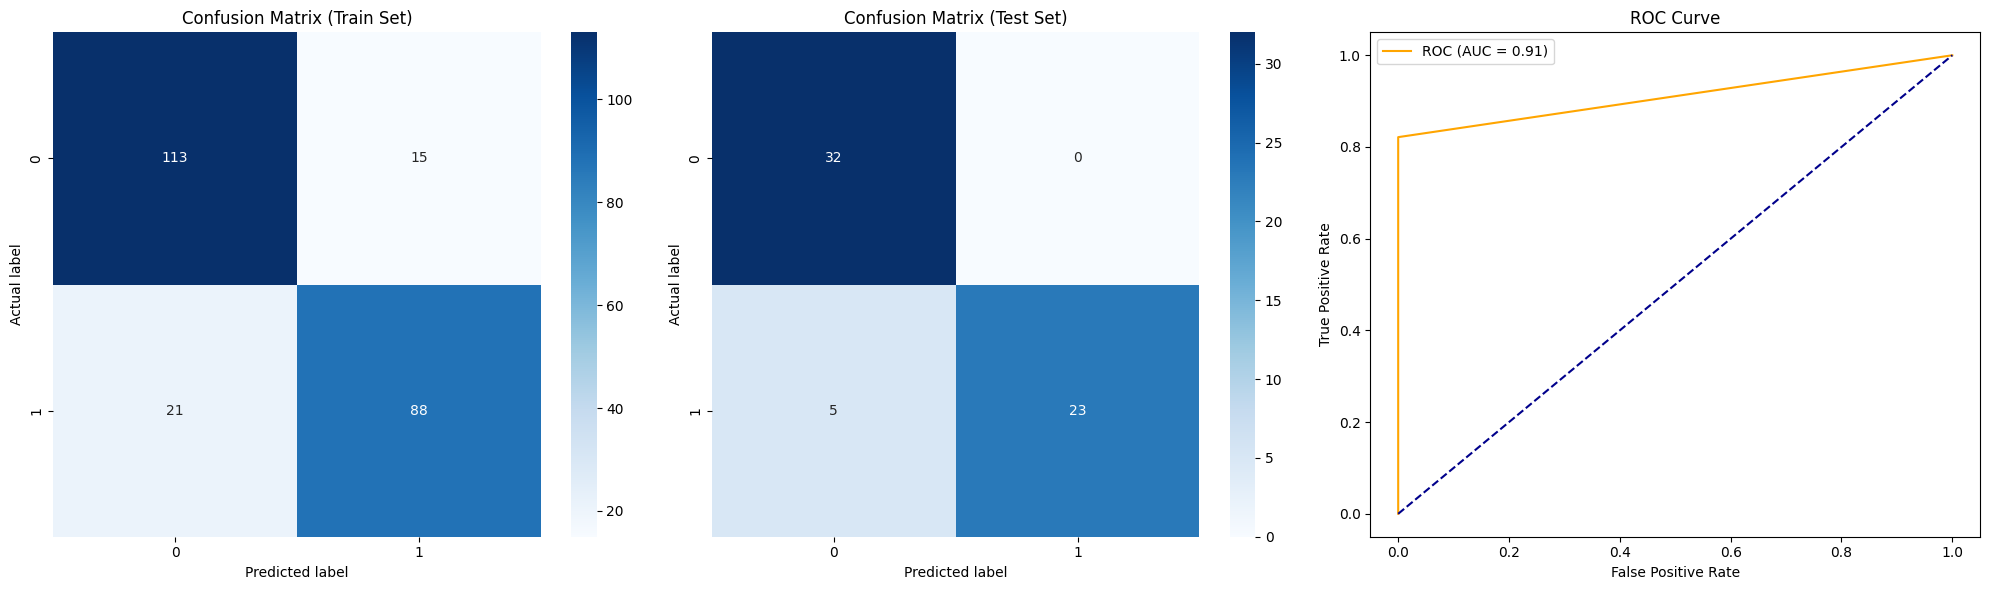

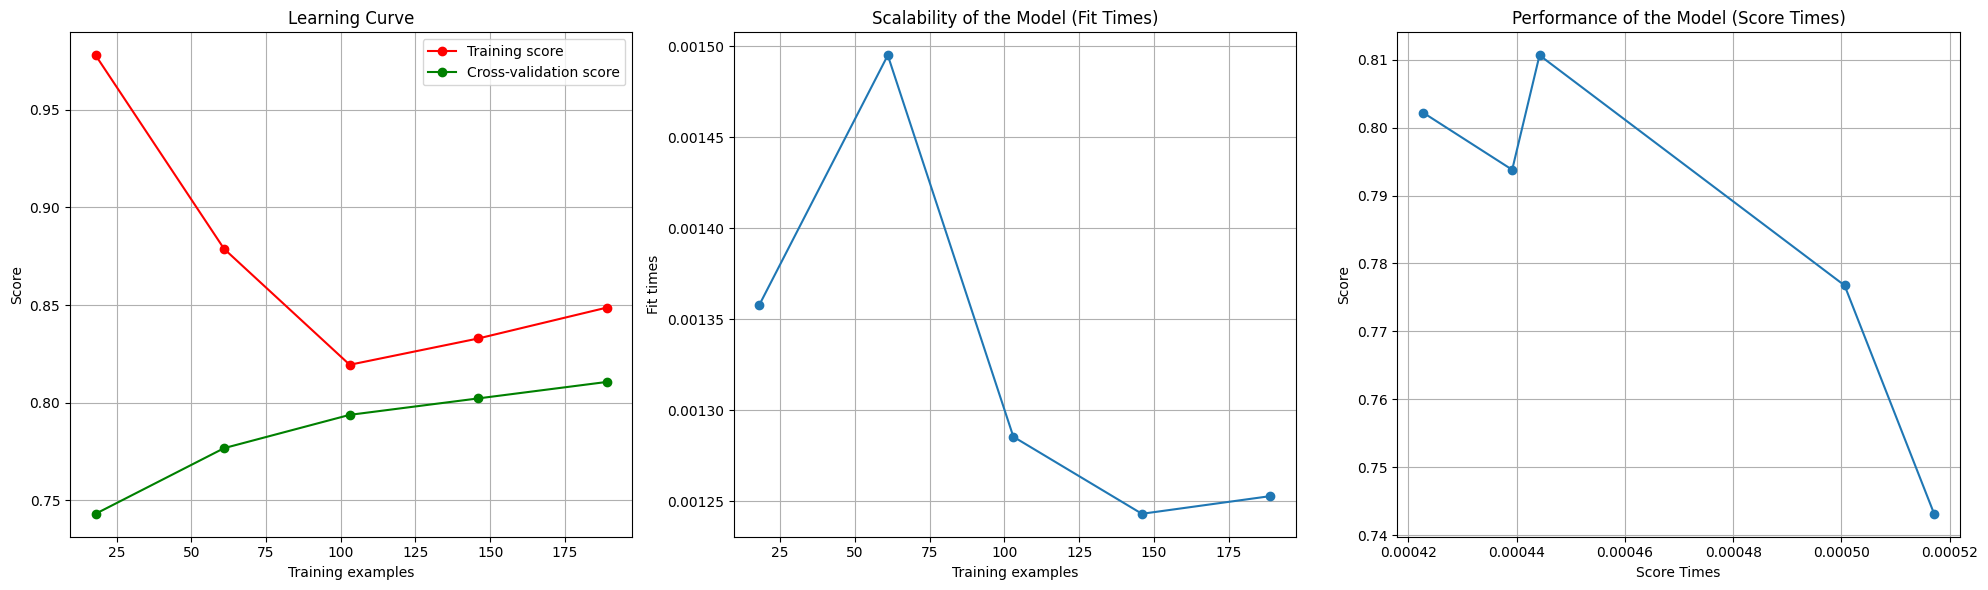

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60

________________________________________________________________________________________________

Hyper Parameter Tuning for : LogisticRegression
 Best Params:  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 5000, 'penalty': 'l1', 'solver': 'liblinear'}
Training Model: LogisticRegression
	Train
		F1 score: 0.8169.
		Accuracy score: 0.8354.
	Test
		F1 score: 0.8800.
		Accuracy score: 0.9000.

	Precision score: 1.0000.
	Recall score: 0.7857.


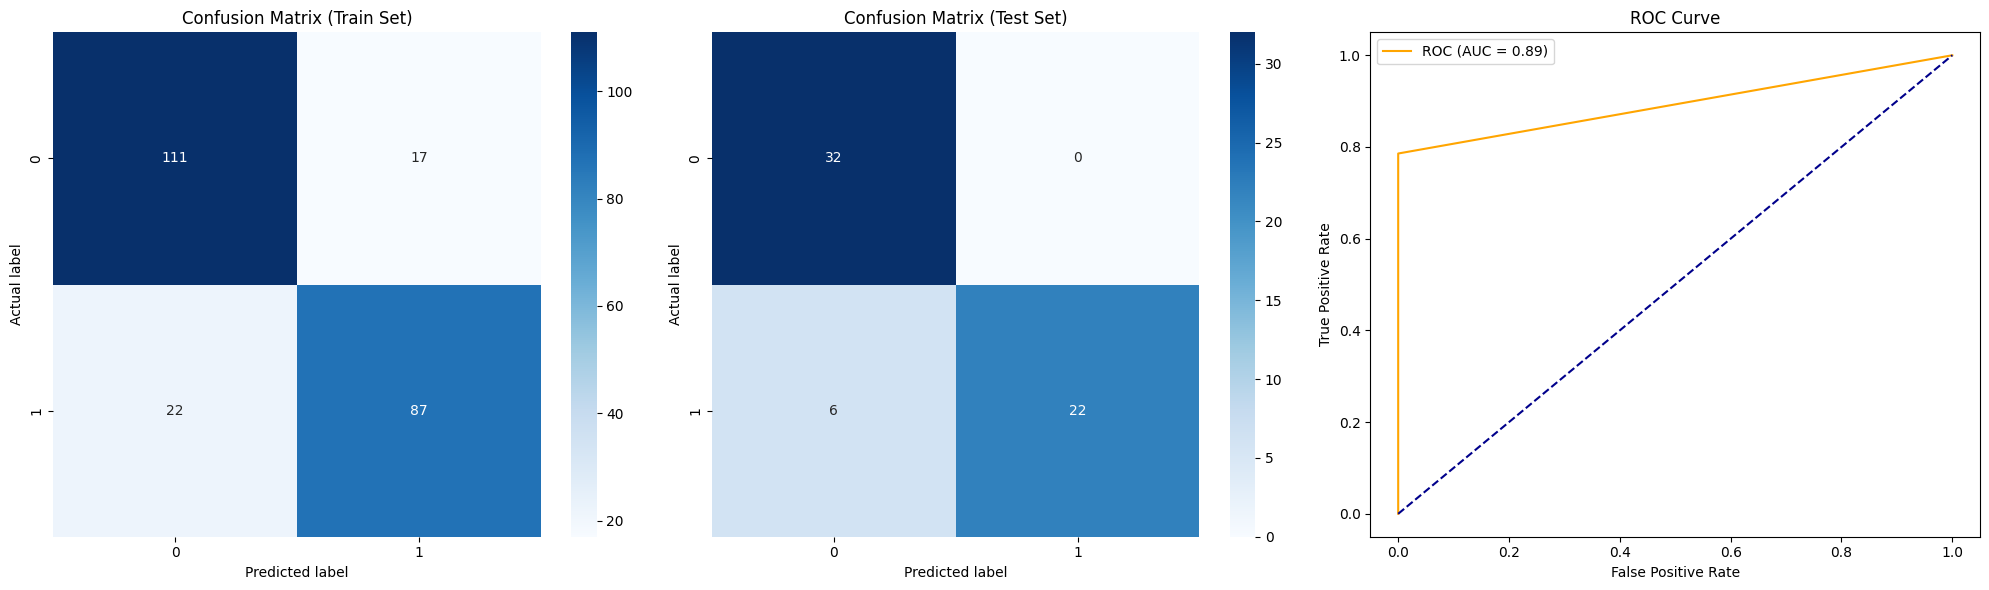

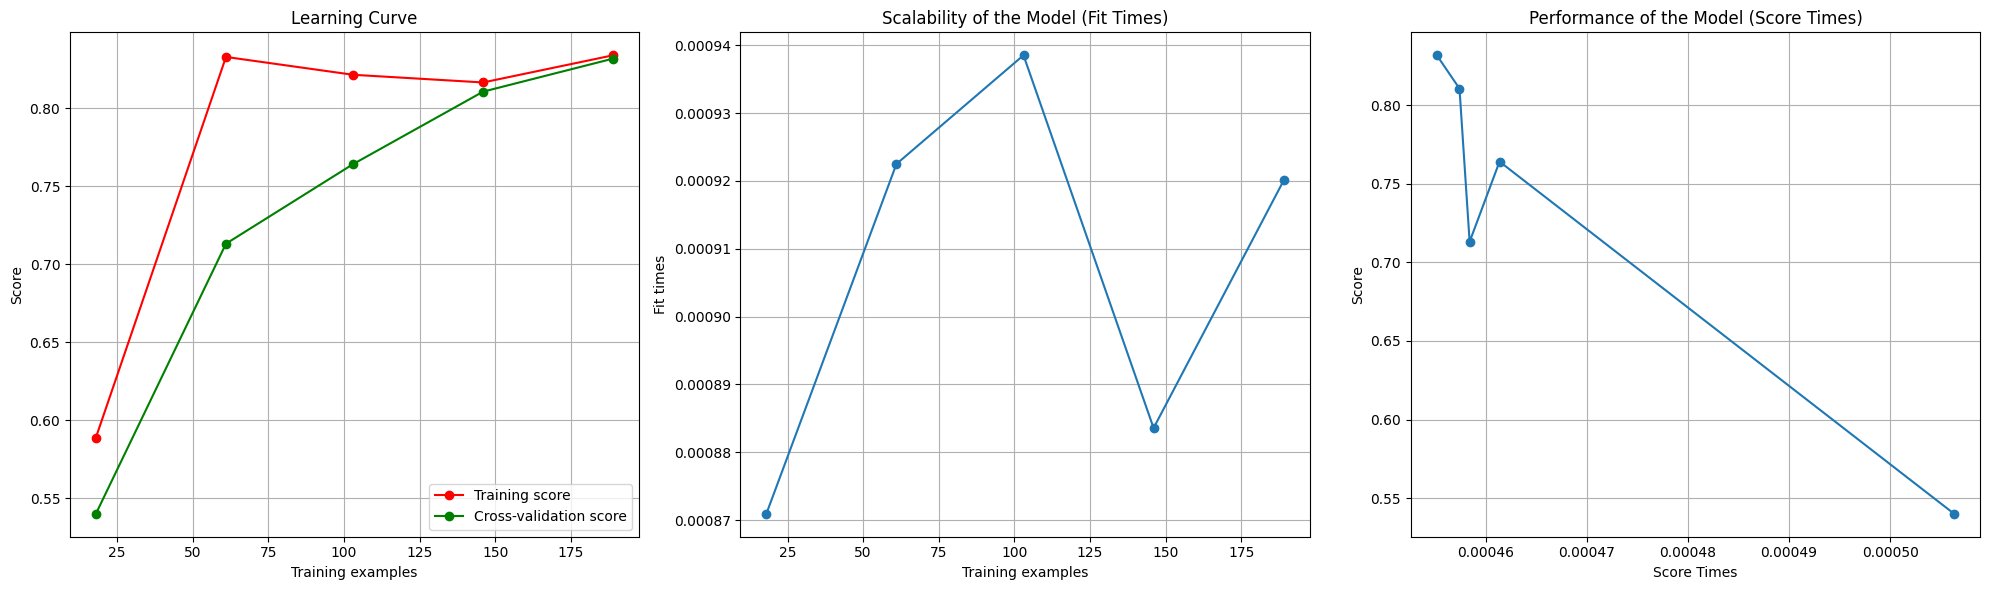

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60

________________________________________________________________________________________________

K-Fold Cross Validation for : LogisticRegression
Training Model: LogisticRegression
	Train
		F1 score: 0.8169.
		Accuracy score: 0.8354.
	Test
		F1 score: 0.8800.
		Accuracy score: 0.9000.

	Precision score: 1.0000.
	Recall score: 0.7857.


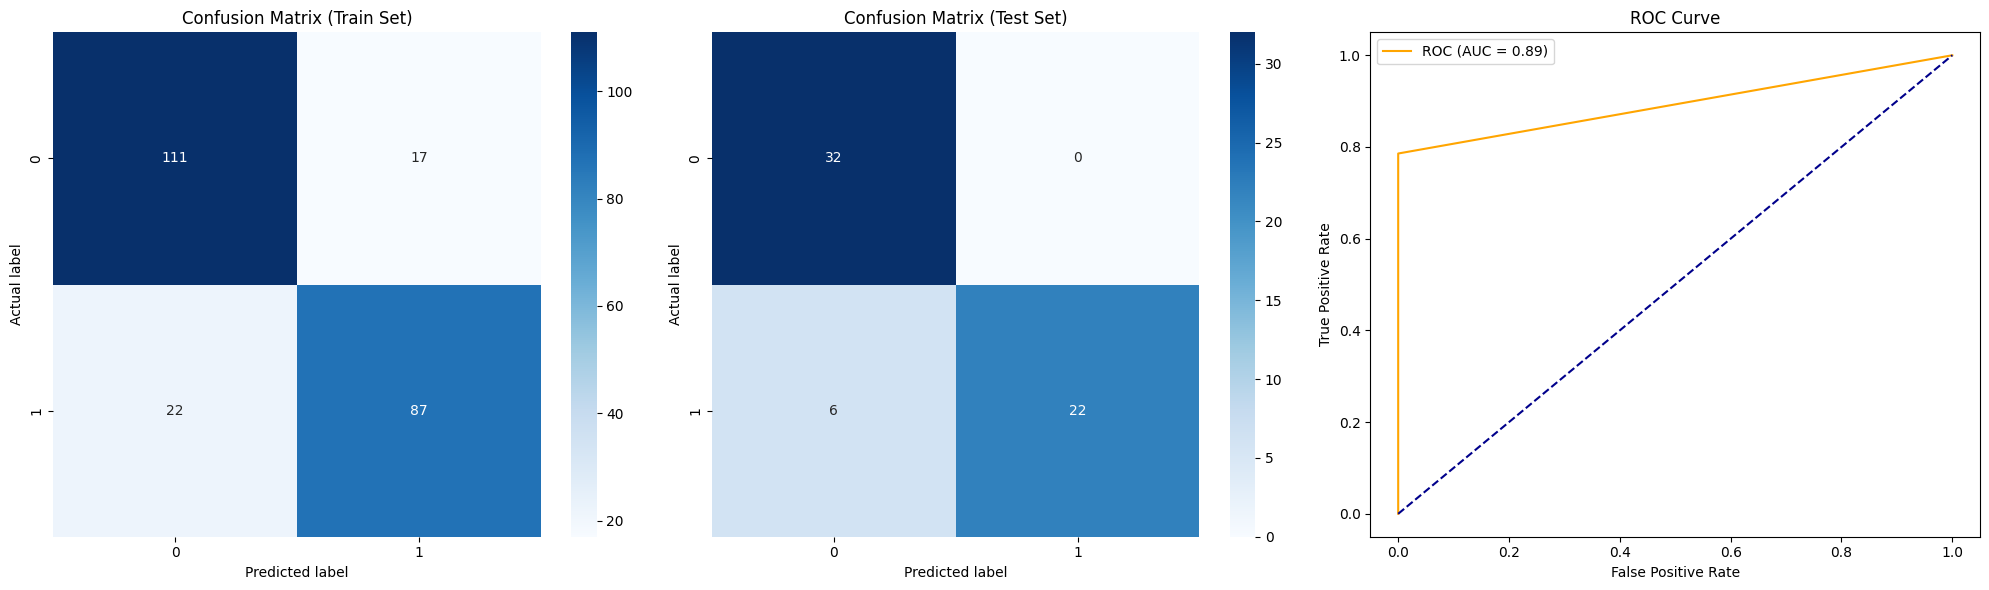

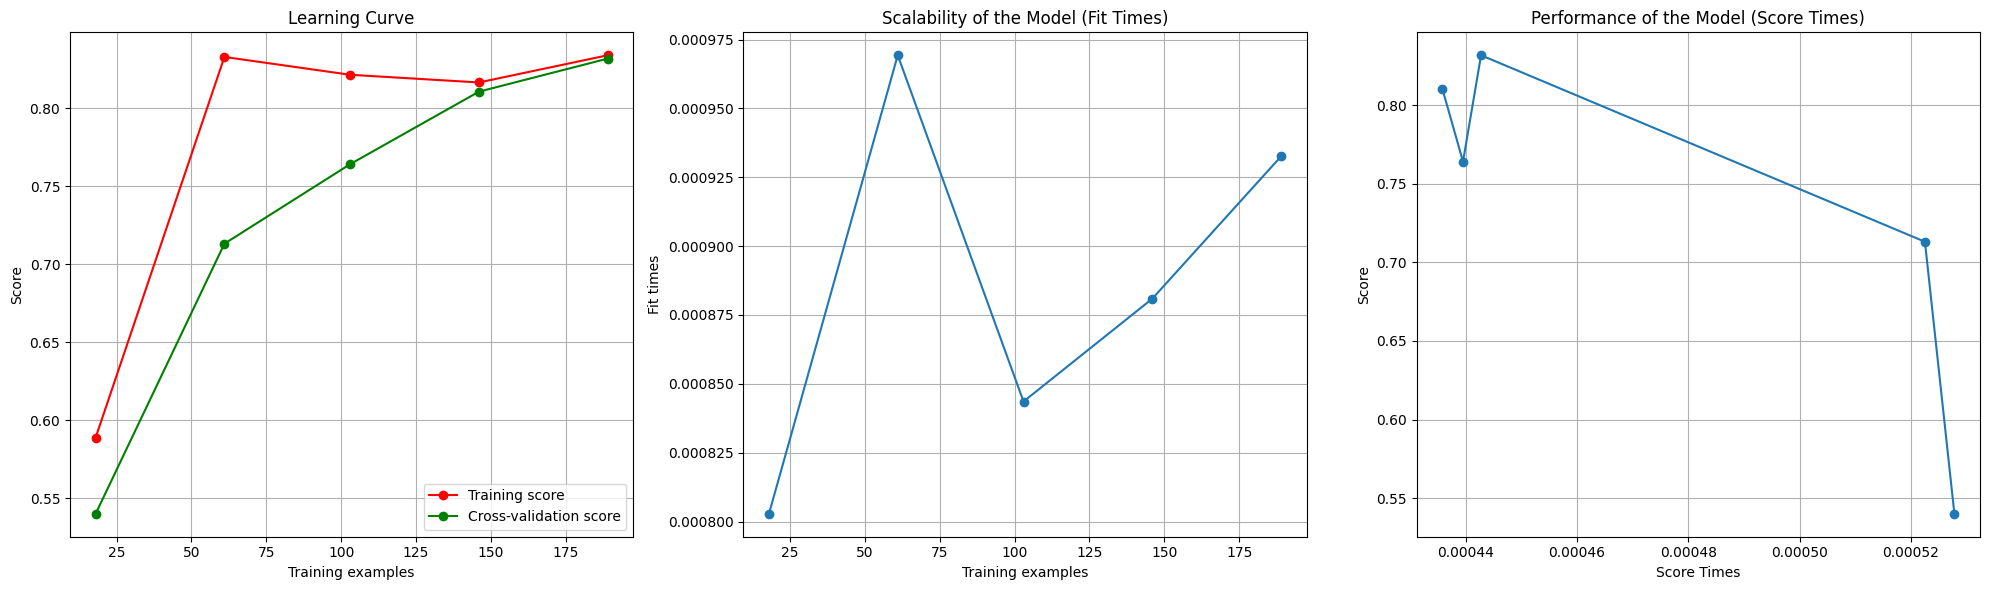

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60

________________________________________________________________________________________________

Validation Curve for : LogisticRegression


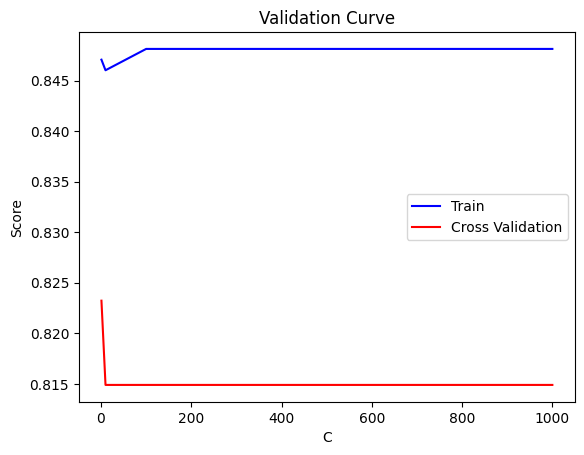

In [ ]:
logisticRegression = LogisticRegression()

print("Logistic Regression - Base Model")
train(logisticRegression, X_train, X_test, y_train, y_test)
learning_curve(logisticRegression, X_train, y_train)

print('________________________________________________________________________________________________\n')

logisticRegressionHyperTuned = LogisticRegression()
hyperparameters =  [{'solver': ['liblinear'], 'max_iter': [100, 300, 500, 1000], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': ['balanced'], 'penalty': ['l1', 'l2']}]
best_hyperparameters = hyper_parameter(logisticRegressionHyperTuned, hyperparameters, X_train, y_train)

logisticRegressionHyperTuned.set_params(**best_hyperparameters)
train(logisticRegressionHyperTuned, X_train, X_test, y_train, y_test)

print('________________________________________________________________________________________________\n')

logisticRegressionKfmodel = k_fold_cross_validation(logisticRegressionHyperTuned, 3, X_train, y_train)
train(logisticRegressionKfmodel, X_train, X_test, y_train, y_test)

print('________________________________________________________________________________________________\n')

validationCurve(np.array([1, 10, 100, 500, 1000]), "C", X_train, y_train, logisticRegressionKfmodel)